In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [2]:
print(fruits.shape)

(59, 7)


In [3]:
print(fruits['fruit_name'].unique())
print(fruits['fruit_subtype'].unique())

['apple' 'mandarin' 'orange' 'lemon']
['granny_smith' 'mandarin' 'braeburn' 'golden_delicious' 'cripps_pink'
 'spanish_jumbo' 'selected_seconds' 'turkey_navel' 'spanish_belsan'
 'unknown']


In [4]:
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


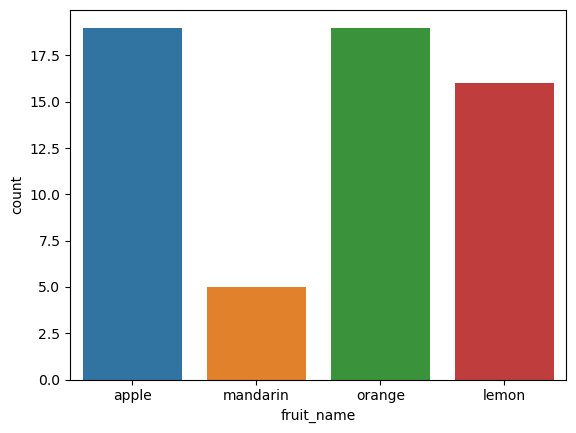

In [5]:
import seaborn as sns
sns.countplot(x=fruits['fruit_name'])
plt.show()

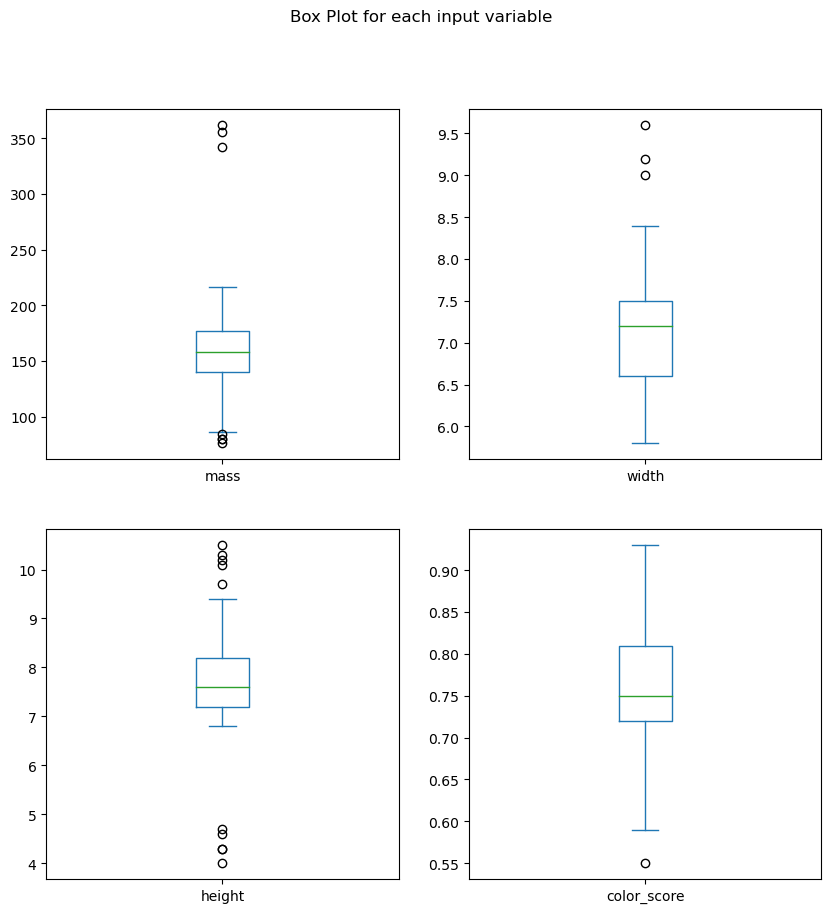

In [6]:
fruits.drop('fruit_label',axis=1).plot(kind='box',subplots=True,layout=(2,2), sharex=False,sharey=False, figsize=(10,10),title='Box Plot for each input variable')
plt.savefig('fruits_box')
plt.show()

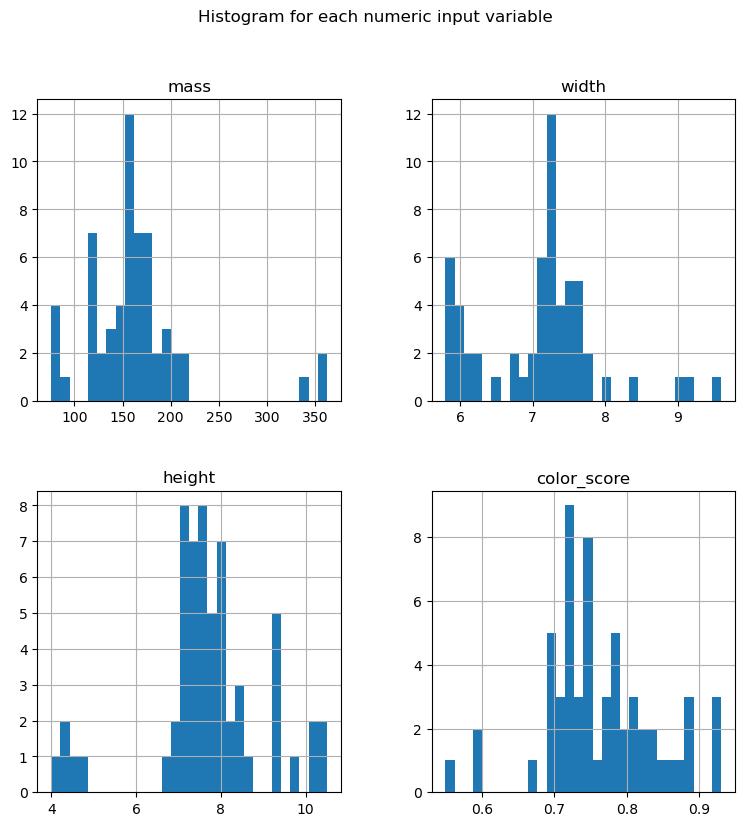

In [7]:
import pylab as pl
fruits.drop('fruit_label', axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

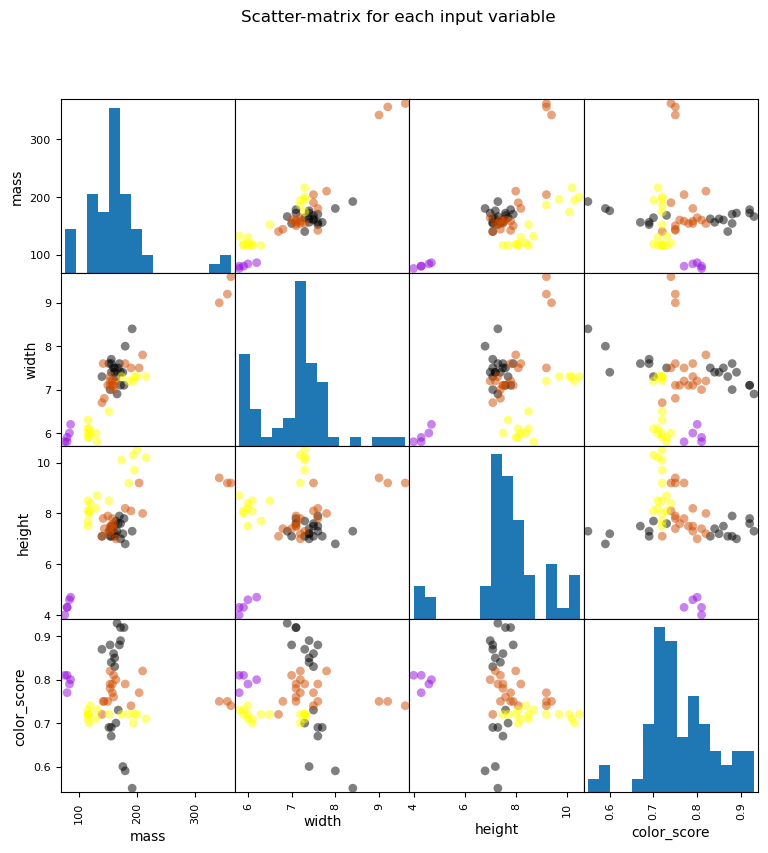

In [8]:
from pandas.plotting import scatter_matrix
from matplotlib import colormaps as cm

feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']

cmap = cm['gnuplot']
scatter = scatter_matrix(X, c=y,marker='o', s=40,hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [10]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test,y_test)))

Accuracy of Logistic regression classifier on training set: 0.75
Accuracy of Logistic regression classifier on test set: 0.47


In [11]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train,y_train)

print('Accuracy of Decision Tree Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(clf.score(X_test,y_test)))

Accuracy of Decision Tree Classifier on training set: 1.00
Accuracy of Decision Tree Classifier on test set: 0.87


In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN Classifier on training set: {:.2f}'.format(knn.score(X_test, y_test)))

print('Accuracy of K-NN Classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN Classifier on training set: 1.00
Accuracy of K-NN Classifier on test set: 1.00


In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'.format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'.format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.86
Accuracy of LDA classifier on test set: 0.67


In [14]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB Classifier on training set: {:.2f}'.format(gnb.score(X_train, y_train)))
print('Accuracy of GNB Classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

Accuracy of GNB Classifier on training set: 0.86
Accuracy of GNB Classifier on test set: 0.67


In [15]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'.format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.91
Accuracy of SVM classifier on test set: 0.80


In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[4 0 0 0]
 [0 1 0 0]
 [0 0 8 0]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [43]:
from matplotlib import colormaps as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import sklearn

X = fruits[['mass', 'width', 'height','color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

def plot_fruit_knn(X,y,n_neighbors, weights):
    X_mat = X[['height','width']].to_numpy()
    y_mat = y.to_numpy()
    
# create color maps
    cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF','#AFAFAF'])
    cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF','#AFAFAF'])

    clf = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights = weights)
    clf.fit(X_mat, y_mat)

#Plot the decision boundary by assigning a color in the color map
# to each mesh point.

    mesh_step_size = .01 #step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:,0].min() -1, X_mat[:,0].max() +1
    y_min, y_max = X_mat[:,1].min() - 1, X_mat[:,1].max() +1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),np.arange(y_min,y_max,mesh_step_size))
    Z = clf.predict
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    #Plot training points
    plt.scatter(X_mat[:,0],X_mat[:,1], s=plot_symbol_size,c=y,cmap=cmap_bold,edgecolor='black')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    
    patch0 = mpatches.Patch(color='#FF0000',label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')

    plt.legend(handles=[patch0,patch1,patch2,patch3])
    plt.xlabel('height(cm)')
    plt.ylabel('width(cm)')
    plt.title('4-Class classification (k = %i, weights = "%s")'%(n_neighbors, weights))
    plt.show()

plot_fruit_knn(X_train,y_train,5,'uniform')
    

AttributeError: 'function' object has no attribute 'reshape'

In [36]:
features = ['mass', 'width', 'height', 'color_score']
trying = fruits[features]

print(trying)

    mass  width  height  color_score
0    192    8.4     7.3         0.55
1    180    8.0     6.8         0.59
2    176    7.4     7.2         0.60
3     86    6.2     4.7         0.80
4     84    6.0     4.6         0.79
5     80    5.8     4.3         0.77
6     80    5.9     4.3         0.81
7     76    5.8     4.0         0.81
8    178    7.1     7.8         0.92
9    172    7.4     7.0         0.89
10   166    6.9     7.3         0.93
11   172    7.1     7.6         0.92
12   154    7.0     7.1         0.88
13   164    7.3     7.7         0.70
14   152    7.6     7.3         0.69
15   156    7.7     7.1         0.69
16   156    7.6     7.5         0.67
17   168    7.5     7.6         0.73
18   162    7.5     7.1         0.83
19   162    7.4     7.2         0.85
20   160    7.5     7.5         0.86
21   156    7.4     7.4         0.84
22   140    7.3     7.1         0.87
23   170    7.6     7.9         0.88
24   342    9.0     9.4         0.75
25   356    9.2     9.2         0.75
2